In [1]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data

In [14]:
folder_path = u'C:/Users/user/Desktop/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)


In [15]:
folder_path = u'C:/Users/user/Desktop/AI-project/features/250' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Label mapping

In [16]:
#Sobstitute N, S, V with 0, 1, 2
label_mapping = {'N': 0, 'S': 1, 'V': 1}
for data in all_data_list:
    data['annotation'] = data['annotation'].replace(label_mapping)

# Drop positions columns    

In [5]:
#drop the columns which contain positional info
#for i in range(len(all_data_list)):
#    all_data_list[i] = all_data_list[i].drop(['peak_pos', 'onset', 'diastolic_notch'], axis=1)

In [17]:
all_data_list[0]

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055274,0.823215,0.886627,0.719899,0.042081,0.425326,0.723122,0.288666,0.024067,0.643411,0.967991,0.210000,0.000000,0.015020,0.000992,0
1,0.045354,0.814343,0.884302,0.712917,0.040983,0.423003,0.726116,0.288231,0.024067,0.232558,0.909492,0.229630,0.027357,0.015020,0.000561,0
2,0.045747,0.813519,0.884597,0.712486,0.040809,0.422454,0.726397,0.288305,0.022864,0.232558,0.910596,0.228571,0.027357,0.015020,0.000578,0
3,0.047270,0.813824,0.885389,0.713275,0.040509,0.422070,0.726600,0.288490,0.022864,0.240310,0.911700,0.227586,0.027357,0.008678,0.000659,0
4,0.036112,0.818934,0.883222,0.712234,0.038791,0.425694,0.724313,0.287615,0.027677,0.201550,0.901766,0.240000,0.021094,0.020360,0.000249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.046900,0.811773,0.884741,0.711761,0.041072,0.421604,0.726617,0.288342,0.025271,0.279070,0.915011,0.225000,0.031641,0.018358,0.000684,0
1956,0.049071,0.812713,0.885598,0.713176,0.040937,0.421452,0.726687,0.288525,0.025271,0.279070,0.915011,0.225000,0.030653,0.017356,0.000793,0
1957,0.047486,0.813713,0.876084,0.713276,0.050609,0.428090,0.762211,0.286395,0.036101,0.333333,0.912804,0.226667,0.029664,0.051736,0.002078,0
1958,0.049821,0.810715,0.870102,0.712228,0.057901,0.430694,0.737648,0.285364,0.046931,0.488372,0.924945,0.219512,0.063612,0.112483,0.005547,0


# Divide train/test

In [18]:
# Split Data
#A list of all csv is gived: because each element of a list represent a patient,
# a patient will stay only or in train or in test
train_list, test_list = train_test_split(all_data_list, test_size=0.2, random_state=42)
#train_list, val_list = train_test_split(train_list, test_size=0.2, random_state=42)

In [19]:
#Create a dataframe only for train and one for all test data
train_data = pd.DataFrame()
i = 0
for train in train_list:
    train_data = pd.concat([train_data, train], ignore_index=True)
    i = i + 1

In [20]:
# Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']

In [21]:
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(y_train, columns=['annotation'])

one_hot_encoded_array_train = one_hot_encoded_df.values

In [22]:
test_data = pd.DataFrame()

for test in test_list:
    test_data = pd.concat([test_data, test], ignore_index=True)

In [23]:
X_test = test_data.drop('annotation', axis=1)
y_test= test_data['annotation']

In [24]:
one_hot_encoded_df_test = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test = one_hot_encoded_df_test.values

In [26]:
N_train = (y_train == 0).sum() 
notN_train = (y_train == 1).sum() 

N_test = (y_test == 0).sum() 
notN_test = (y_test == 1).sum() 

N_perc = N_train/(N_train+notN_train)
notN_perc = notN_train/(N_train+notN_train)

print(f"Perc di N in train: {N_perc}")
print(f"Perc di notN in train: {notN_perc}")

N_perc = N_test/(N_test+notN_test)
notN_perc = notN_test/(N_test+notN_test)

print(f"Perc di N in test: {N_perc}")
print(f"Perc di notN in test: {notN_perc}")


Perc di N in train: 0.9240884203168686
Perc di notN in train: 0.0759115796831314
Perc di N in test: 0.9049530732924645
Perc di notN in test: 0.0950469267075354


# Useful functions

In [27]:
# produce a normalized convulational matrix
def show_confusion_matrix(y_predi, model_name_pred):

    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    cm = confusion_matrix(test_classes, predicted_class)
    classes_name = ['N', 'notN']
    
    
    #Normalized cm
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.title(model_name_pred)
    plt.show()

In [28]:
def downsample_majority_class(df, class_column):
    
    # Calculate the class counts
    class_counts = df[class_column].value_counts()
    
    print(class_counts)

    # Find the maximum value among the two least represented classes
    min_class_size = class_counts.nsmallest(2).min()

    subsampled_df = pd.DataFrame()

    for class_label in class_counts.index:
        class_subset = df[df[class_column] == class_label]

        # Downsample if this is the majority class
        if class_counts[class_label] > min_class_size:
            class_subset = class_subset.sample(n=min_class_size, random_state=42)
        
        subsampled_df = pd.concat([subsampled_df, class_subset], ignore_index=True)
        
    class_counts_sub = subsampled_df[class_column].value_counts()
    print(class_counts_sub)

    return subsampled_df

In [29]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def compute_metrics (y_predi):
    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    print("Balanced accuracy score: ", balanced_accuracy_score(test_classes, predicted_class))
    print("Accuracy score: ", accuracy_score(test_classes, predicted_class))
    print("F1 score: ", f1_score(test_classes, predicted_class,average='macro'))
    print("Precision score: ", precision_score(test_classes, predicted_class,average='macro'))
    print("Recall score: ", recall_score(test_classes, predicted_class,average='macro'))
    

# Class weights

In [30]:
nN = np.count_nonzero(y_train == 0)
nnotN = np.count_nonzero(y_train == 1)


class_sum = nN+nnotN
wN = round(1-(nN/class_sum),2)
wnotN = round(1-(nnotN/class_sum),2)  


class_freq = {0: wN, 1: wnotN}

print(class_freq)

{0: 0.08, 1: 0.92}


In [31]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight='balanced', classes=[0.,1.], y=y_train)

keys = np.arange(0,2,1)
class_weights = dict(zip(keys, weights))
class_weights

{0: 0.5410737641626877, 1: 6.586610397084213}

# Feature selection

In [20]:
'''
cor_matrix = X_train.corr().abs()
feature_list = X_train.columns
f = plt.figure(figsize=(10, 8))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)
plt.yticks(range(len(feature_list)), feature_list, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
'''

'\ncor_matrix = X_train.corr().abs()\nfeature_list = X_train.columns\nf = plt.figure(figsize=(10, 8))\nplt.matshow(cor_matrix, fignum=f.number)\nplt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)\nplt.yticks(range(len(feature_list)), feature_list, fontsize=10)\ncb = plt.colorbar()\ncb.ax.tick_params(labelsize=14)\n'

In [21]:
'''
correlated_features = set()
correlation_matrix = X_train.corr()
median_corr = (correlation_matrix.abs()).median(axis=0)

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            if median_corr[i] < median_corr[j]:
                colname = correlation_matrix.columns[i]
            else:
                colname = correlation_matrix.columns[j]
            correlated_features.add(colname)
X_train.drop(labels=correlated_features, axis=1, inplace=True)
# see how it drops correlated / drop the one that had a lower correlation w.r to the other feat
print('Deleted features: ' + str(correlated_features))
'''

"\ncorrelated_features = set()\ncorrelation_matrix = X_train.corr()\nmedian_corr = (correlation_matrix.abs()).median(axis=0)\n\nfor i in range(len(correlation_matrix .columns)):\n    for j in range(i):\n        if abs(correlation_matrix.iloc[i, j]) > 0.7:\n            if median_corr[i] < median_corr[j]:\n                colname = correlation_matrix.columns[i]\n            else:\n                colname = correlation_matrix.columns[j]\n            correlated_features.add(colname)\nX_train.drop(labels=correlated_features, axis=1, inplace=True)\n# see how it drops correlated / drop the one that had a lower correlation w.r to the other feat\nprint('Deleted features: ' + str(correlated_features))\n"

In [22]:
'''
cor_matrix = X_train.corr().abs()
feature_list = list(X_train.columns)
f = plt.figure(figsize=(10, 8))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)
plt.yticks(range(len(feature_list)), feature_list, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
'''

'\ncor_matrix = X_train.corr().abs()\nfeature_list = list(X_train.columns)\nf = plt.figure(figsize=(10, 8))\nplt.matshow(cor_matrix, fignum=f.number)\nplt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)\nplt.yticks(range(len(feature_list)), feature_list, fontsize=10)\ncb = plt.colorbar()\ncb.ax.tick_params(labelsize=14)\n'

In [23]:
'''
X_test = X_test[feature_list]
X_test
'''

'\nX_test = X_test[feature_list]\nX_test\n'

In [24]:
'''
from sklearn.decomposition import PCA
varianceThreshold = 0.9
pca_features = PCA(n_components = varianceThreshold) # dimensionality reduction
pca_features.fit(X_train)

X_train = pca_features.transform(X_train)
print(np.shape(X_train))

X_test = pca_features.transform(X_test)
print(np.shape(X_test))
'''

'\nfrom sklearn.decomposition import PCA\nvarianceThreshold = 0.9\npca_features = PCA(n_components = varianceThreshold) # dimensionality reduction\npca_features.fit(X_train)\n\nX_train = pca_features.transform(X_train)\nprint(np.shape(X_train))\n\nX_test = pca_features.transform(X_test)\nprint(np.shape(X_test))\n'

# Downsampled sets

In [32]:
train = pd.concat([X_train,y_train],axis=1)
train

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055880,0.801983,0.799544,0.681870,0.070597,0.433180,0.458742,0.485321,0.018545,0.212121,0.941617,0.775000,0.000000,0.065539,0.003993,0
1,0.057403,0.803716,0.801356,0.682360,0.070312,0.432627,0.458752,0.485533,0.017118,0.202020,0.941617,0.775000,0.102538,0.067653,0.004384,0
2,0.057984,0.802885,0.800347,0.682358,0.071546,0.432986,0.458729,0.485352,0.019971,0.232323,0.943114,0.772414,0.104569,0.065539,0.004580,0
3,0.057484,0.803932,0.800936,0.682399,0.070705,0.432987,0.458743,0.485465,0.018545,0.212121,0.941617,0.775000,0.102538,0.068710,0.004438,0
4,0.057938,0.802728,0.801323,0.682332,0.070741,0.432279,0.458749,0.485501,0.018545,0.222222,0.943114,0.772414,0.105584,0.064482,0.004605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137339,0.049199,0.836044,0.187404,0.199390,0.808075,1.000000,0.572823,0.890823,0.377079,1.000000,0.665098,0.935655,0.019520,0.015022,0.000000,0
137340,0.046219,0.836044,0.187404,0.199143,0.806709,1.000000,0.572820,0.887826,0.292135,1.000000,0.745937,0.934561,0.019624,0.014918,0.000000,0
137341,0.036760,0.836044,0.187404,0.197617,0.802374,1.000000,0.572812,0.869294,0.207640,1.000000,0.826347,0.930344,0.019520,0.035990,0.000000,0
137342,0.266708,0.836044,0.187404,0.201062,0.907759,1.000000,0.573021,0.911134,0.032360,1.000000,0.993157,0.941120,0.040494,0.137492,0.282995,0


In [33]:
train_df = downsample_majority_class(train,'annotation')

# Creating training and testing sets
X_train_d = train_df.drop(['annotation'], axis=1)
y_train_d = train_df['annotation']

annotation
0    126918
1     10426
Name: count, dtype: int64
annotation
0    10426
1    10426
Name: count, dtype: int64


# Models

# K-NN

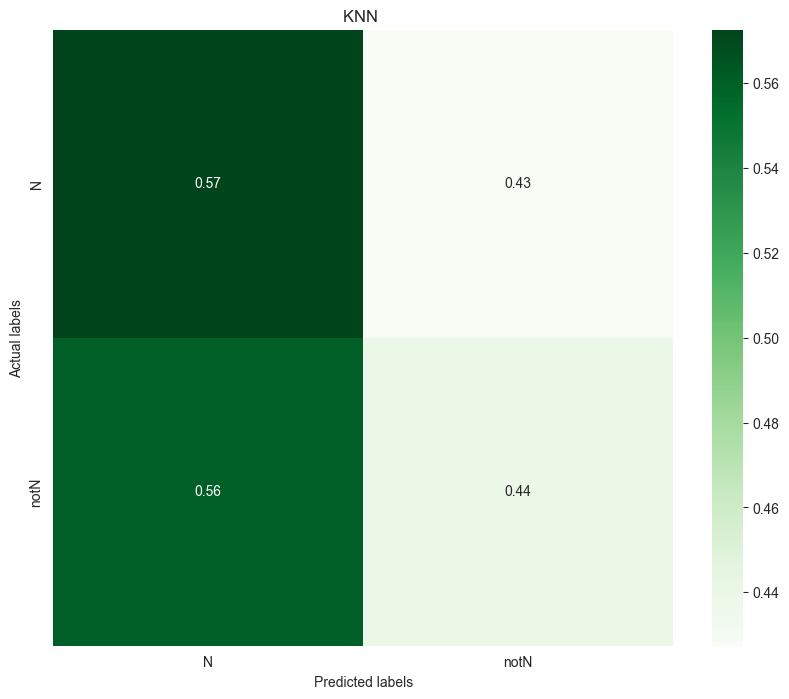

Balanced accuracy score:  0.506175348446911
Accuracy score:  0.5599468344816362
F1 score:  0.4307893932639004
Precision score:  0.5021688604378698
Recall score:  0.506175348446911


In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train_d, y_train_d)

y_pred_knn = neigh.predict(X_test)
    
one_hot_encoded_pred_knn = pd.get_dummies(y_pred_knn, columns=['0'])
show_confusion_matrix(one_hot_encoded_pred_knn, "KNN ")
compute_metrics(one_hot_encoded_pred_knn)

# SVM

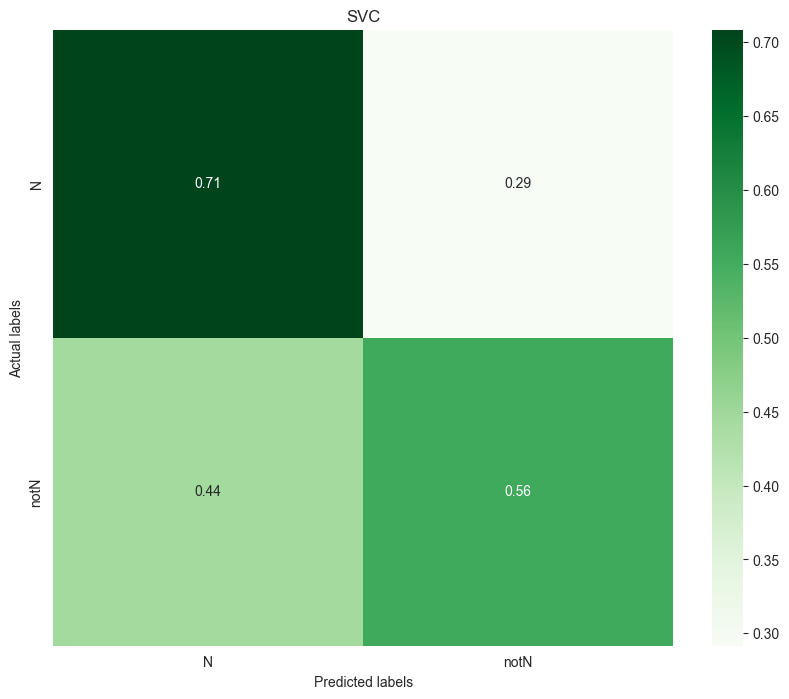

Balanced accuracy score:  0.6317453377082011
Accuracy score:  0.6938371399121142
F1 score:  0.5317749719338054
Precision score:  0.5523707819461394
Recall score:  0.6317453377082011


In [35]:
from sklearn.svm import SVC 
clfSVC = SVC(kernel='rbf',C=0.01,class_weight='balanced') 
 
# fitting x samples and y classes 
clfSVC.fit(X_train_d, y_train_d)

y_pred_SVC = clfSVC.predict(X_test)
    
one_hot_encoded_pred_SVC = pd.get_dummies(y_pred_SVC, columns=['0'])
show_confusion_matrix(one_hot_encoded_pred_SVC, "SVC")
compute_metrics(one_hot_encoded_pred_SVC)

# Random Forest

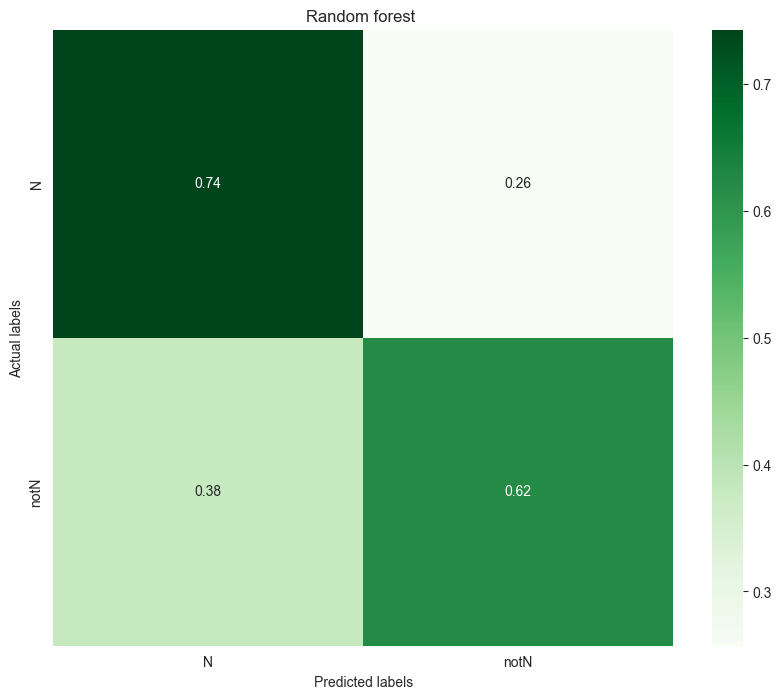

Balanced accuracy score:  0.6814698006974276
Accuracy score:  0.7311343785601909
F1 score:  0.5690751360056373
Precision score:  0.5755458076531942
Recall score:  0.6814698006974276


In [36]:
from sklearn.ensemble import RandomForestClassifier
    
randomForestModel = RandomForestClassifier(n_estimators=30,
                                            criterion='entropy',
                                            max_depth=15,
                                            min_samples_split=20,
                                            class_weight=None
                                            )
    
    
randomForestModel.fit(X_train_d, y_train_d)
y_pred_RF = randomForestModel.predict(X_test)
    
one_hot_encoded_pred_RF = pd.get_dummies(y_pred_RF, columns=['0'])
show_confusion_matrix(one_hot_encoded_pred_RF, "Random forest ")
compute_metrics(one_hot_encoded_pred_RF)

# Balanced random forest

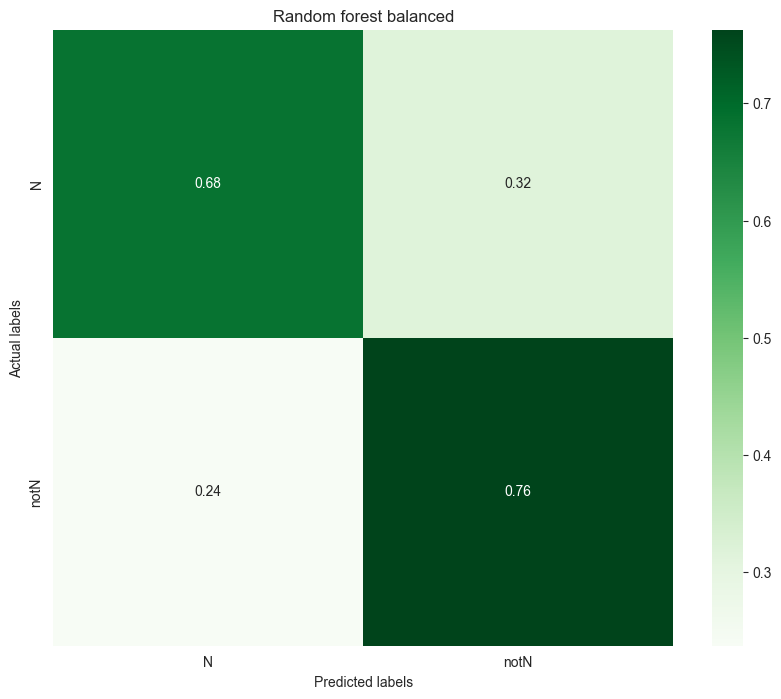

Balanced accuracy score:  0.7231273656025681
Accuracy score:  0.6909618618781533
F1 score:  0.5597360874400613
Precision score:  0.5833994079447515
Recall score:  0.7231273656025681


In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier
BalancedRandomForestModel = BalancedRandomForestClassifier(n_estimators= 50,
                                                   criterion= 'entropy',
                                                   max_depth= 50,
                                                   min_samples_split= 30,
                                                   min_samples_leaf = 1,
                                                   min_weight_fraction_leaf = 0.0,
                                                   max_features= None,
                                                   sampling_strategy='not minority',
                                                   replacement= False,
                                                   n_jobs= -1,
                                                   random_state=100,
                                                   class_weight= None,
                                                   bootstrap=True
                                                   )
BalancedRandomForestModel.fit(X_train, y_train)
y_pred_BRF = BalancedRandomForestModel.predict(X_test)
one_hot_encoded_pred_BRF = pd.get_dummies(y_pred_BRF, columns=['0'])

show_confusion_matrix(one_hot_encoded_pred_BRF, "Random forest balanced")
compute_metrics(one_hot_encoded_pred_BRF)

# AdaBoost

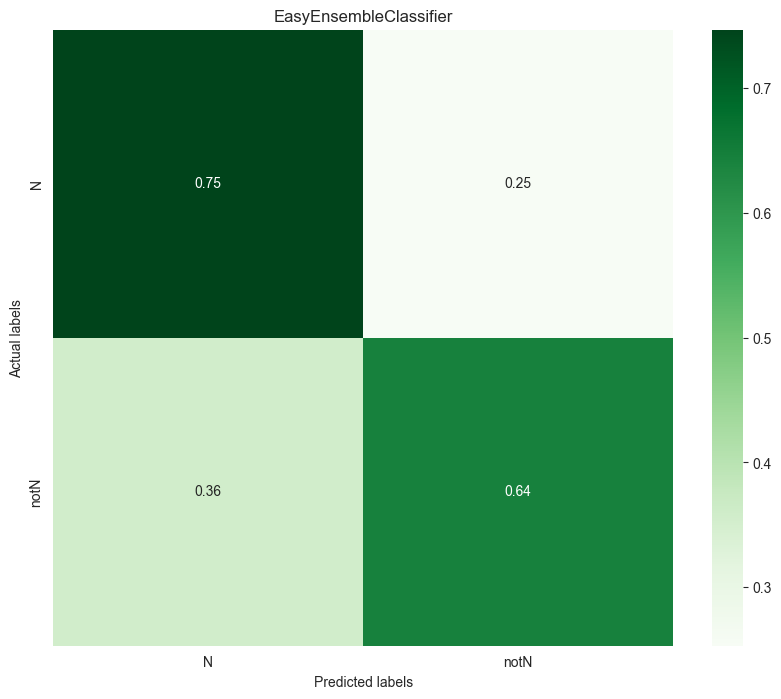

Balanced accuracy score:  0.6949535471412394
Accuracy score:  0.7370476862149405
F1 score:  0.5772435750023895
Precision score:  0.5814183318666941
Recall score:  0.6949535471412394


In [38]:

from imblearn.ensemble import EasyEnsembleClassifier

modelEasyEns = EasyEnsembleClassifier(n_estimators=50, 
                                      n_jobs=-1, 
                                      random_state=42,
                                      sampling_strategy='majority'
                                      )
modelEasyEns.fit(X_train, 
                 y_train)

y_predEasyEns = modelEasyEns.predict(X_test)
one_hot_encoded_pred_ens = pd.get_dummies(y_predEasyEns, columns=['0'])

show_confusion_matrix(one_hot_encoded_pred_ens, "EasyEnsembleClassifier")
compute_metrics(one_hot_encoded_pred_ens)

# Neural Network

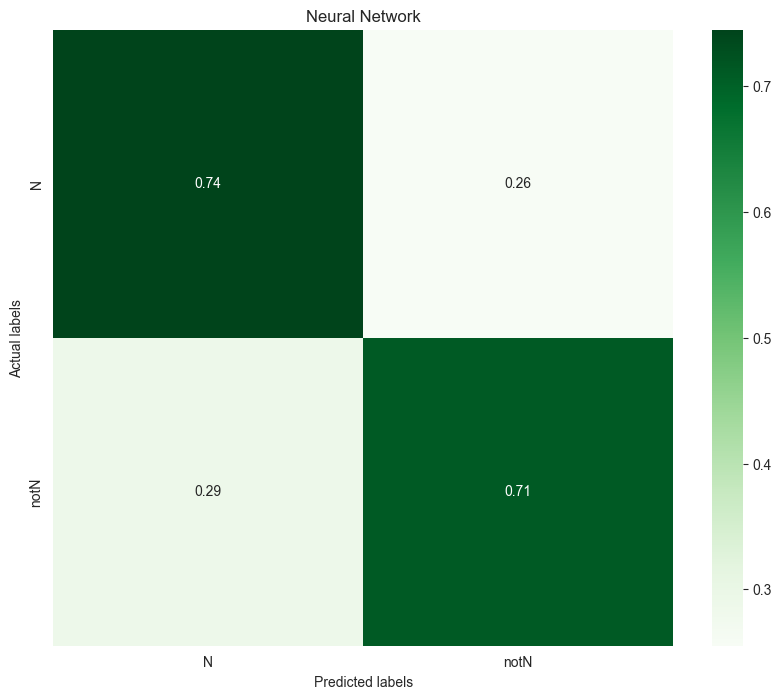

Balanced accuracy score:  0.727993343532781
Accuracy score:  0.7416047306461238
F1 score:  0.5913174321173184
Precision score:  0.5936440771461365
Recall score:  0.727993343532781


In [39]:
# Neural Network
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(7,5,3), 
                            max_iter=1000, 
                            alpha=0.001)
mlpc.fit(X_train_d,
                 y_train_d)

y_predmlpc = mlpc.predict(X_test)
one_hot_encoded_pred_mlpc = pd.get_dummies(y_predmlpc, columns=['0'])

show_confusion_matrix(one_hot_encoded_pred_mlpc, "Neural Network")
compute_metrics(one_hot_encoded_pred_mlpc)


